### 1. Turning postal codes into provinces

In [1]:
import pandas as pd

# Read the file
input_file = "../astha/immovlan_cleaned_file.csv"
df = pd.read_csv(input_file)

# Map postcode to province
provinces = {
    "brussels": list(range(1000, 1300)),
    "brabant_walloon": list(range(1300, 1500)),
    "brabant_flemish": list(range(1500, 2000)) + list(range(3000, 3500)),
    "antwerp": list(range(2000, 3000)),
    "limburg": list(range(3500, 4000)),
    "liege": list(range(4000, 4500)),
    "namur": list(range(4500, 5681)),
    "hainaut": list(range(5681, 6600)) + list(range(7000, 8000)),
    "luxembourg": list(range(6600, 7000)),
    "west_flanders": list(range(8000, 9000)),
    "east_flanders": list(range(9000, 10000))
}
def postcode_to_province(postcode):
    # Brussels
    if postcode in provinces["brussels"]:
        return "Brussels"
    # Walloon Brabant
    if postcode in provinces["brabant_walloon"]:
        return "Walloon Brabant"
    # Flemish Brabant
    if postcode in provinces["brabant_flemish"]:
        return "Flemish Brabant"
    # Antwerp
    if postcode in provinces["antwerp"]:
        return "Antwerp"
    # Limburg
    if postcode in provinces["limburg"]:
        return "Limburg"

    # Liege
    if postcode in provinces["liege"]:
        return "Liege"

    # Namur
    if postcode in provinces["namur"]:
        return "Namur"

    # Hainaut
    if postcode in provinces["hainaut"]:
        return "Hainaut"

    # Luxembourg
    if postcode in provinces["luxembourg"]:
        return "Luxembourg"

    # West Flanders
    if postcode in provinces["west_flanders"]:
        return "West Flanders"

    # East Flanders
    if postcode in provinces["east_flanders"]:
        return "East Flanders"

    return "Unknown"

df["province"] = df["postal_code"].apply(postcode_to_province)

#display(df.keys())

# Code testing
print("Provinces distribution:")
print(df["province"].value_counts(dropna=False))

Provinces distribution:
province
Namur              2447
Walloon Brabant    1625
Hainaut            1503
Limburg            1502
Brussels           1443
Antwerp            1408
Luxembourg         1387
West Flanders      1293
Flemish Brabant    1283
East Flanders      1238
Liege              1180
Name: count, dtype: int64


### 2. Aggregate the median price and number of observations of each province in a Dataframe

In [2]:
province_median_summary = df.groupby("province")["Price"].agg(median_price="median", n_obs="count").reset_index()
province_median_summary.index += 1
province_mean_summary = df.groupby("province")["Price"].agg(mean_price="mean", n_obs="count").reset_index().round(2)
province_mean_summary.index += 1
display(province_median_summary)
display(province_mean_summary)

,province,median_price,n_obs
1,Antwerp,335000.0,1394
2,Brussels,429000.0,1435
3,East Flanders,385000.0,1222
4,Flemish Brabant,414904.0,1239
5,Hainaut,232400.0,1443
6,Liege,275000.0,1117
7,Limburg,325000.0,1451
8,Luxembourg,275000.0,1313
9,Namur,279500.0,2233
10,Walloon Brabant,385000.0,1609


,province,mean_price,n_obs
1,Antwerp,385367.68,1394
2,Brussels,548583.62,1435
3,East Flanders,448566.98,1222
4,Flemish Brabant,496121.36,1239
5,Hainaut,259911.76,1443
6,Liege,289565.28,1117
7,Limburg,348713.57,1451
8,Luxembourg,301006.33,1313
9,Namur,301085.25,2233
10,Walloon Brabant,442028.37,1609


### 3. Pick a shapefile (map) that matches your provinces (with a GeoJSON or shapefile)

In [3]:
import geopandas as gpd

# Download the 1:10m Natural Earth “Admin 1 – States, Provinces” shapefile for Belgium
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_10m_admin_1_states_provinces.geojson"
provinces_map = gpd.read_file(url).query("iso_a2 == 'BE'")



# Testing: list the columns that contains province names
print(provinces_map[["name", "name_en"]])

                 name           name_en
200     West Flanders     West Flanders
201           Hainaut           Hainaut
203             Namur             Namur
205        Luxembourg        Luxembourg
208             Liege             Liège
760     East Flanders     East Flanders
762           Antwerp           Antwerp
763           Limburg           Limburg
1709         Brussels  Brussels Capital
1710  Flemish Brabant   Flemish Brabant
1711  Walloon Brabant   Walloon Brabant


### 4. Load the map and harmonise province names

In [4]:
# Load Natural-Earth provinces in Belgium
provinces_map = gpd.read_file(url).query("iso_a2 == 'BE'")[["name_en", "geometry"]]

# Rename column to match our data
provinces_map = provinces_map.rename(columns={"name_en": "province"})

# Spelling fixes so names == province_summary
name_fix = {
    "Liège": "Liege",
    "Brussels Capital": "Brussels",
}
provinces_map["province"] = provinces_map["province"].replace(name_fix)

# Testing
display(province_median_summary)
print("Mapped provinces:", sorted(provinces_map["province"].unique()))
print("Data provinces:", sorted(province_median_summary["province"].unique()))

,province,median_price,n_obs
1,Antwerp,335000.0,1394
2,Brussels,429000.0,1435
3,East Flanders,385000.0,1222
4,Flemish Brabant,414904.0,1239
5,Hainaut,232400.0,1443
6,Liege,275000.0,1117
7,Limburg,325000.0,1451
8,Luxembourg,275000.0,1313
9,Namur,279500.0,2233
10,Walloon Brabant,385000.0,1609


Mapped provinces: ['Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant', 'Hainaut', 'Liege', 'Limburg', 'Luxembourg', 'Namur', 'Walloon Brabant', 'West Flanders']
Data provinces: ['Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant', 'Hainaut', 'Liege', 'Limburg', 'Luxembourg', 'Namur', 'Walloon Brabant', 'West Flanders']


### 5. Merge price data into the map

In [5]:
# Left join so every province polygon gets its median price and observation count
provinces_map_median = provinces_map.merge(province_median_summary, on="province", how="left")
provinces_map_mean = provinces_map.merge(province_mean_summary, on="province", how="left")

# Testing

# Median
display(provinces_map_median.head())
display(provinces_map_median[["province", "median_price", "n_obs"]].sort_values("median_price"))

# Mean
display(provinces_map_mean.head())
display(provinces_map_mean[["province", "mean_price", "n_obs"]].sort_values("mean_price"))

,province,geometry,median_price,n_obs
0,West Flanders,"POLYGON ((2.65062 50.81225, 2.64245 50.81246, ...",319500.0,1269
1,Hainaut,"MULTIPOLYGON (((2.88688 50.69665, 2.87128 50.6...",232400.0,1443
2,Namur,"POLYGON ((4.83136 50.1434, 4.8201 50.14645, 4....",279500.0,2233
3,Luxembourg,"POLYGON ((5.19248 49.68281, 5.16943 49.6872, 5...",275000.0,1313
4,Liege,"POLYGON ((6.03863 50.14841, 6.02736 50.14945, ...",275000.0,1117


,province,median_price,n_obs
1,Hainaut,232400.0,1443
3,Luxembourg,275000.0,1313
4,Liege,275000.0,1117
2,Namur,279500.0,2233
0,West Flanders,319500.0,1269
7,Limburg,325000.0,1451
6,Antwerp,335000.0,1394
5,East Flanders,385000.0,1222
10,Walloon Brabant,385000.0,1609
9,Flemish Brabant,414904.0,1239


,province,geometry,mean_price,n_obs
0,West Flanders,"POLYGON ((2.65062 50.81225, 2.64245 50.81246, ...",364727.58,1269
1,Hainaut,"MULTIPOLYGON (((2.88688 50.69665, 2.87128 50.6...",259911.76,1443
2,Namur,"POLYGON ((4.83136 50.1434, 4.8201 50.14645, 4....",301085.25,2233
3,Luxembourg,"POLYGON ((5.19248 49.68281, 5.16943 49.6872, 5...",301006.33,1313
4,Liege,"POLYGON ((6.03863 50.14841, 6.02736 50.14945, ...",289565.28,1117


,province,mean_price,n_obs
1,Hainaut,259911.76,1443
4,Liege,289565.28,1117
3,Luxembourg,301006.33,1313
2,Namur,301085.25,2233
7,Limburg,348713.57,1451
0,West Flanders,364727.58,1269
6,Antwerp,385367.68,1394
10,Walloon Brabant,442028.37,1609
5,East Flanders,448566.98,1222
9,Flemish Brabant,496121.36,1239


### 6. Make a basic map with matplotlib coloured by median_price and mean_price

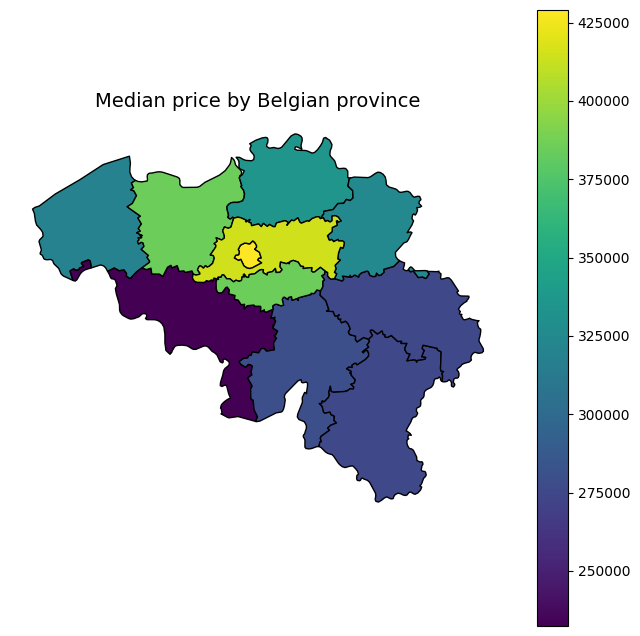

In [6]:
# median_price map
# Choropleth of median prices by province
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(8, 8))

# Basic choropleth
provinces_map_median.plot(
    column="median_price",
    cmap="viridis",
    edgecolor="black",
    legend=True,
    ax=axis
)

axis.set_title("Median price by Belgian province", fontsize=14)
axis.set_axis_off()
plt.show()

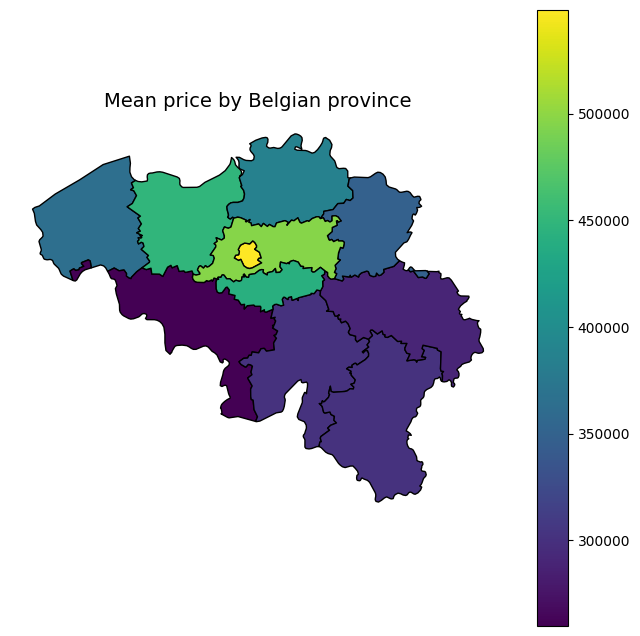

In [7]:
# mean_price map
# Choropleth of mean prices by province
fig, axis = plt.subplots(figsize=(8, 8))

# Basic choropleth
provinces_map_mean.plot(
    column="mean_price",
    cmap="viridis",
    edgecolor="black",
    legend=True,
    ax=axis
)

axis.set_title("Mean price by Belgian province", fontsize=14)
axis.set_axis_off()
plt.show()

### 7. Polish & explore

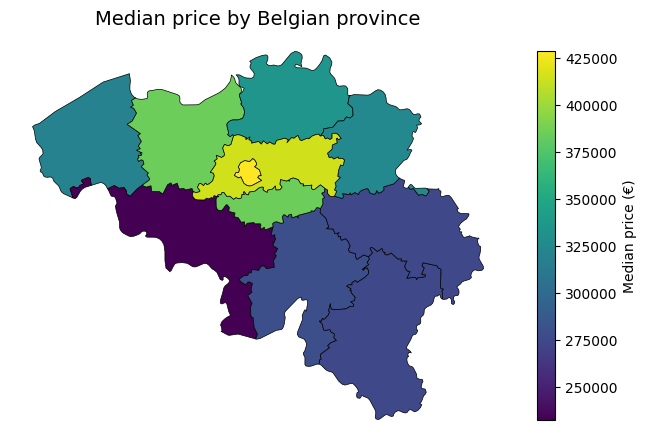

In [21]:
import matplotlib as mpl

# Continuous color bar
fig, axis = plt.subplots(figsize=(8, 8))
provinces_map_median.plot(column="median_price",
                        cmap="viridis",
                        linewidth=0.5,
                        edgecolor="black",
                        ax=axis)

sm = plt.cm.ScalarMappable(
        cmap="viridis",
        norm=mpl.colors.Normalize(vmin=provinces_map_median["median_price"].min(),
                                  vmax=provinces_map_median["median_price"].max()))
sm.set_array([])
fig.colorbar(sm, ax=axis, shrink=0.6, label="Median price (€)")
axis.set_title("Median price by Belgian province", fontsize=14)
axis.set_axis_off()
plt.show()

### 8. Add interactive tool-tips

In [25]:
import folium, json

# centre on Belgium
m = folium.Map(location=[50.5, 4.5], zoom_start=8)

# build the choropleth
folium.Choropleth(
    geo_data=provinces_map_median.to_json(),
    data=provinces_map_median,
    columns=["province", "median_price"],
    key_on="feature.properties.province",
    fill_color="YlGn",
    nan_fill_color="grey",
    legend_name="Median price (€)"
).add_to(m)

# add hover tool-tips
from folium import features

tooltip = features.GeoJsonTooltip(
    fields=["province", "median_price", "n_obs"],
    aliases=["Province:", "Median price (€):", "Observations:"],
    localize=True
)

features.GeoJson(
    provinces_map_median.to_json(),
    tooltip=tooltip,
    style_function=lambda x: {"fillOpacity": 0, "weight": 0}
).add_to(m)

m